# CS4347 Assignment 4: Regression on the Wine Quality Dataset

## Dataset
The Wine Quality dataset consists of 11 input variables and 1 output variable, which is the quality of the wine on a scale of 0 to 10. The input variables include information about the physicochemical properties of the wine, such as its acidity, pH, and alcohol content. The dataset contains two files, `winequality-white.csv` with 4898 samples and `winequality-red.csv` with 1599 samples. The dataset is available at https://archive.ics.uci.edu/ml/datasets/wine+quality. In this assignment we will use the white wine dataset. The dataset has been downloaded for you and is available in the `data` folder.

## Task 1 [50 points]: Compare the performance of linear regression, kNN regression, and decision tree regression implemented in the Scikit-learn library on the Wine Quality dataset.

In each one of the steps below, you can import the necessary libraries required to complete the task.

### 1. Load the `winequality-white.csv` dataset from the CSV file and display the first 5 rows, and display a histogram of the quality values.

In [25]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


ww = pd.read_csv('data/winequality-white.csv', delimiter= ";", index_col=0)
print(ww.head())


               volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity                                                             
7.0                        0.27         0.36            20.7      0.045   
6.3                        0.30         0.34             1.6      0.049   
8.1                        0.28         0.40             6.9      0.050   
7.2                        0.23         0.32             8.5      0.058   
7.2                        0.23         0.32             8.5      0.058   

               free sulfur dioxide  total sulfur dioxide  density    pH  \
fixed acidity                                                             
7.0                           45.0                 170.0   1.0010  3.00   
6.3                           14.0                 132.0   0.9940  3.30   
8.1                           30.0                  97.0   0.9951  3.26   
7.2                           47.0                 186.0   0.9956  3.19   
7.2                     

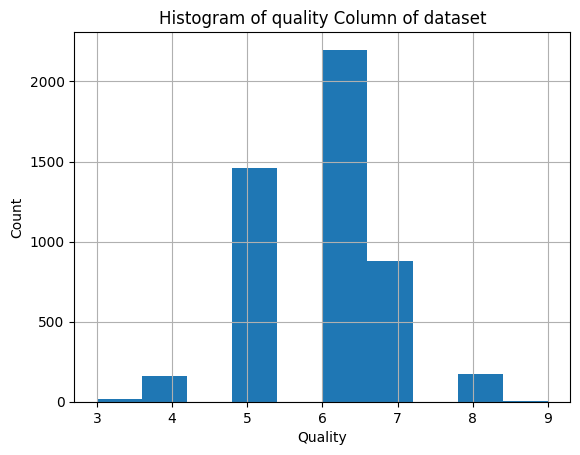

In [26]:
# Display a histogram of the quality column
# YOUR CODE HERE
ww["quality"].hist()
plt.ylabel("Count")
plt.xlabel("Quality")
plt.title("Histogram of quality Column of dataset")
plt.show()

### 2. Split the dataset into features `X` and target variables `y`, and then split them into training and test sets using a 70/30 split, using a random seed of 43. Display the shapes of the training and test sets.

In [27]:
# YOUR CODE HERE
X = ww.drop("quality", axis=1)
y = ww["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

print("Size of X_train", X_train.shape)
print("Size of X_test", X_test.shape)
print("Size of y_train", y_train.shape)
print("Size of y_test", y_test.shape)

Size of X_train (3428, 10)
Size of X_test (1470, 10)
Size of y_train (3428,)
Size of y_test (1470,)


### 3. Instantiate the three regression models: `LinearRegression`, `KNeighborsRegressor`, and `DecisionTreeRegressor`.

For the `KNeighborsRegressor`, set the number of neighbors to 5 and the distance metric to Euclidian distance. For the `DecisionTreeRegressor`, set the maximum depth to 5.

In [28]:
# YOUR CODE HERE
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
dt = DecisionTreeRegressor(max_depth=5)

### 4. Fit each model on the training data and predict the target variable for the test data.

In [29]:
# YOUR CODE HERE
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

### 5. Implement functions to calculate the Residual Standard Error (RSE) and R-squared for each model.

The Residual Sum of Squares (RSS) and Total Sum of Squares (TSS) are defined respectively as $ RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 $ and $ TSS = \sum_{i=1}^{n}(y_i - \bar{y})^2 $, where $y_i$ is the i-th observed value of the dependent variable, $\hat{y_i}$ is the predicted value of the dependent variable for the i-th observation, and the sum is taken over all n observations.

The Residual Standard Error (RSE) is define as:

$$ RSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n - p - 1}} = \sqrt{\frac{RSS}{n - p - 1}} $$

where n is the number of observations, and p is the number of parameters in the model.

The $R^2$ (R-squared) is define as:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} = 1 - \frac{RSS}{TSS}$$

**Implement the functions `rse()` and `r_squared()` based on the above formulas to use for the calculations.**

In [30]:
# YOUR CODE HERE

def rse(y_true, y_pred, p):
    n = len(y_true)
    rss = np.sum(np.square(y_true - y_pred))
    rse = np.sqrt(rss / (n - p - 1))
    return rse


def r_squared(y_true, y_pred):
    tss = np.sum(np.square(y_true - np.mean(y_true)))
    rss = np.sum(np.square(y_true - y_pred))
    r_squared = 1 - (rss / tss)
    return r_squared

### 6. Use your functions to calculate the RSE and R-squared for each model using the predicted and actual target variables on the test data. Display the results.

In [31]:
# YOUR CODE HERE
lr_rse = rse(y_test, y_pred_lr, X_test.shape[1])
lr_r_squared = r_squared(y_test, y_pred_lr)

print("Linear Regression RSE:", lr_rse)
print("Linear Regression R-squared:", lr_r_squared)

knn_rse = rse(y_test, y_pred_knn, X_test.shape[1])
knn_r_squared = r_squared(y_test, y_pred_knn)

print("KNN Regression RSE:", knn_rse)
print("KNN Regression R-squared:", knn_r_squared)

dt_rse = rse(y_test, y_pred_dt, X_test.shape[1])
dt_r_squared = r_squared(y_test, y_pred_dt)

print("Decision Tree Regression RSE:", dt_rse)
print("Decision Tree Regression R-squared:", dt_r_squared)


Linear Regression RSE: 0.7612132775910977
Linear Regression R-squared: 0.28056191083999815
KNN Regression RSE: 0.8344370118823694
KNN Regression R-squared: 0.13549435103473673
Decision Tree Regression RSE: 0.7585826102627894
Decision Tree Regression R-squared: 0.2855259124447814


### 7. Compare the performance of each model based on the R-squared and RSE scores. Which model performed the best? Which one performed the worst? What might be the reasons for the differences in performance? Write a brief report summarizing your findings and conclusions. Include a discussion of the strengths and weaknesses of each model and how they might be used in practice.

YOUR ANSWER 
R squared measures how well he model fits the data with values of 0-1 and a 1 indicating the perfect fit. Whereas RSE measures the standard deviation of the remaining and is found by using the square root of the mean squared error. Based on the R-squared and RSE scores, the Linear Regression model performed the best, followed by the Decision Tree Regression model, and the KNN Regression model performed the worst.The Linear Regression model had the highest R-squared score, indicating that it was able to explain the largest proportion of variance in the target variable. Additionally, it had the lowest RSE score, indicating that it had the smallest error in predicting the target variable. The Decision Tree Regression model had a relatively high R-squared score and a similar RSE score to the Linear Regression model, indicating that it performed well in predicting the target variable.the KNN Regression model had a relatively low R-squared score and a higher RSE score than the other two models, indicating that it did not perform as well in predicting the target variable. The KNN model may have performed worse due to the fact that it relied on a small number of nearest neighbors, which may not have been representative of the overall dataset.

## Task 2 [50 points]: Implement KNN Regression from scratch

### 1. Implement the KNN Regression algorithm from scratch. Your implementation should include the following functions:

- `euclidean_distance(x1, x2)`: calculates the Euclidean distance between two data points.
- `get_neighbors(X_train, y_train, x_test, k)`: finds the k nearest neighbors of a test data point in the training dataset.
- `predict(X_train, y_train, x_test, k)`: predicts the output variable for a test data point using KNN Regression with k nearest neighbors.
- `evaluate(X_train, y_train, X_test, y_test, k)`: evaluates the performance of the KNN Regression algorithm on a test dataset using the Residual Standard Error (RSE) and R-squared metrics.

In [52]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def get_neighbors(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((i, dist))
    distances = sorted(distances, key=lambda x: x[1])
    neighbors = []
    for i in range(k):
        neighbors.append((X_train[distances[i][0]], y_train[distances[i][0]]))
    return neighbors

def predict(X_train, y_train, x_test, k):
    neighbors = get_neighbors(X_train, y_train, x_test, k)
    total_weight = 0
    weighted_sum = 0
    for neighbor in neighbors:
        distance = euclidean_distance(x_test, neighbor[0])
        #weight = 1 / distance
        epsilon = 1e-5 
        weight = 1 / (distance + epsilon)
        total_weight += weight
        weighted_sum += weight * neighbor[1]
    return weighted_sum / total_weight

def evaluate(X_train, y_train, X_test, y_test, k):
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(predict(X_train, y_train, X_test[i], k))
    y_pred = np.array(y_pred)
    rse = np.sqrt(np.mean((y_test - y_pred)**2))
    mean_y = np.mean(y_test)
    ss_tot = np.sum((y_test - mean_y)**2)
    ss_res = np.sum((y_test - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return rse, r2


### 2. Train your KNN Regression model on the training dataset using k=5 and the same train/test splits that you used in Task 1. Evaluate the performance of your KNN Regression model on the testing dataset using the evaluate function. Report the RSE and R-squared values.

In [53]:

X = ww.drop("quality", axis=1)
y = ww["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

rse, r2 = evaluate(X_train.values, y_train.values, X_test.values, y_test.values, k=5)
print("Residual Standard Error (RSE): ", rse)
print("R-squared: ", r2)

Residual Standard Error (RSE):  0.7572717706347437
R-squared:  0.2826249052228066


### 3. Write a brief report summarizing your observations. Include a discussion of the strengths and weaknesses of your implementation of KNN Regression. How does your implementation compare to the Scikit-learn implementation? Are there differences in the prediction accuracy and speed of the two implementations?

YOUR ANSWER HERE
I implemented a knn regression algorithm from scratch and evaluated the performance on the quality dataset. The performance of my knn regression was actually comparable to the scikit learn. The rse and r squared we pretty similar. But there was some differences with prediction accuracy and speed. One strength of my implementation was it is simple and easy to understand with basic py functions. It is also modular so its easy to edit and fit your needs. My weakness with my implimentation is that it is very slow compared to scikit learn. Scikit learn is made to handle large data sets so it is kind of expected. It could have taken a week to compute on a large dataset with millions of data points. 